In [2]:
import pandas as pd
import numpy as np
import torch
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt


Load Data

In [3]:
# Load dataset
data_path = '../data/nq_sample.tsv'
data = pd.read_csv(data_path, sep='\t')
data.head()


,question,answer
0,What is the capital of France?,Paris
1,Who wrote 'Pride and Prejudice'?,Jane Austen
2,What is the boiling point of water?,100°C
3,What is the largest mammal?,Blue whale
4,Who is the president of the United States?,Joe Biden


Load Pre-trained Model

In [4]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')


A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

Compute Embeddings


In [5]:
def get_embedding(sentence):
    inputs = tokenizer(sentence, return_tensors='pt')
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

# Example embeddings
sentence = "The capital of France is Paris."
embedding = get_embedding(sentence)


Compute Similarities

In [7]:
def get_embedding(sentence):
    inputs = tokenizer(sentence, return_tensors='pt')
    outputs = model(**inputs)
    # Use .mean(dim=1) to get the average of all token embeddings
    return outputs.last_hidden_state.mean(dim=1).squeeze().detach().numpy()

def compute_similarity(embedding1, embedding2):
    # Ensure embeddings are 2D arrays
    embedding1 = embedding1.reshape(1, -1)
    embedding2 = embedding2.reshape(1, -1)
    return cosine_similarity(embedding1, embedding2)[0][0]

sentence1 = "The capital of France is Paris."
sentence2 = "Paris is the capital of France."
embedding1 = get_embedding(sentence1)
embedding2 = get_embedding(sentence2)
similarity = compute_similarity(embedding1, embedding2)
print(f"Cosine Similarity: {similarity}")


Cosine Similarity: 0.9259474873542786


Visualize Embeddings

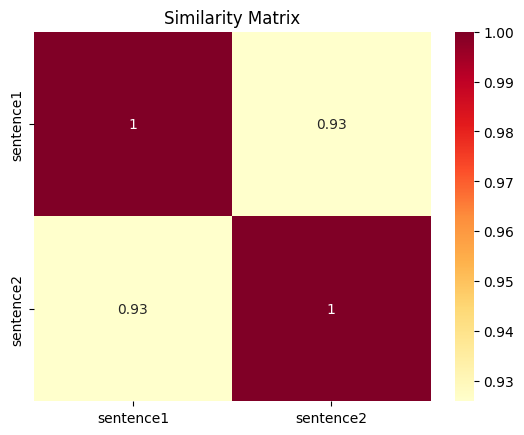

In [8]:
def plot_similarity_matrix(similarity_matrix, labels):
    sns.heatmap(similarity_matrix, xticklabels=labels, yticklabels=labels, cmap="YlOrRd", annot=True)
    plt.title('Similarity Matrix')
    plt.show()

# Example with dummy data
labels = ['sentence1', 'sentence2']
similarity_matrix = np.array([[1.0, similarity], [similarity, 1.0]])
plot_similarity_matrix(similarity_matrix, labels)
